<a href="https://colab.research.google.com/github/RafsanJany-44/NLP_Research/blob/master/tensoreflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

#df = pd.read_csv("https://raw.githubusercontent.com/ajayshewale/Sentiment-Analysis-of-Text-Data-Tweets-/master/data/train.csv")
#https://github.com/vnaazleen/youtube-comment-sentimental-analysis/tree/main

In [29]:
import pandas as pd
import numpy as np


df = pd.read_csv('C:/Users/RAZER/Downloads/dataset/NLP_DB/tweet_train.csv',encoding='latin1')
df = df.query("sentiment == 'negative'")

In [33]:
df["Type"]=0

In [37]:

df.rename(columns = {'text':'Comments'}, inplace = True)

In [38]:
df

,textID,Comments,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),Type
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105,0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26,0
12,74a76f6e0a,My Sharpie is running DANGERously low on ink,DANGERously,negative,morning,0-20,Bahrain,1701575,760.0,2239,0
...,...,...,...,...,...,...,...,...,...,...,...
27464,e7eecffdc8,rec game....trying not to cry...the pain is to...,breakingg,negative,night,31-45,Equatorial Guinea,1402985,28050.0,50,0
27470,778184dff1,lol i know and haha..did you fall asleep?? o...,t bored,negative,night,31-45,Finland,5540720,304000.0,18,0
27472,8f5adc47ec,http://twitpic.com/663vr - Wanted to visit the...,were too late,negative,noon,60-70,Gabon,2225734,257670.0,9,0
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137,0


In [41]:
df = df.loc[:,["Comments","Type"]].reset_index(drop=True)

In [42]:
df

,Comments,Type
0,Sooo SAD I will miss you here in San Diego!!!,0
1,my boss is bullying me...,0
2,what interview! leave me alone,0
3,"Sons of ****, why couldn`t they put them on t...",0
4,My Sharpie is running DANGERously low on ink,0
...,...,...
7776,rec game....trying not to cry...the pain is to...,0
7777,lol i know and haha..did you fall asleep?? o...,0
7778,http://twitpic.com/663vr - Wanted to visit the...,0
7779,wish we could come see u on Denver husband l...,0


In [30]:
df_main = pd.read_csv('C:/Users/RAZER/Downloads/dataset/NLP_DB/Main_data.csv')

In [31]:
df_main["Type"].value_counts()

1.0    2326
0.0     102
Name: Type, dtype: int64

In [36]:
df_main

,Comments,Type
0,there is nothing else like khan academy out th...,1.0
1,sal is amazing. so is chemistry. i really real...,1.0
2,thanks khan academy! wish i had this series wh...,1.0
3,this was a really helpful video in understandi...,1.0
4,always stuns me how the study of the minute bl...,1.0
...,...,...
2631,khan academy is such a good help at physics.,1.0
2632,since physics is a total bitch to me but at le...,1.0
2633,so much helpful! unfortunately i&#39;ve got a ...,1.0
2634,oh god this is a life saver. i nearly cried in...,1.0


In [7]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [8]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
vocab_size = 10000
embedding_dim = 16
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 3600


Preprocess raw text for Sentiment analysis
Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

Tokenizing the string: To tokenize means to split the strings into individual words without blanks or tabs.

Lowercasing: In this step, we will also convert each word in the string to lower case.

Removing stop words and punctuation:

Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the re library to perform regular expression operations on our tweet. We'll define our search pattern and use the sub() method to remove matches by substituting with an empty character (i.e. '').

Stemming: Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.
Consider the words:

learn
learning
learned
learnt
All these words are stemmed from its common root learn. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, happi and sunni. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

happy
happiness
happier
We can see that the prefix happi is more commonly used. We cannot choose happ because it is the stem of unrelated words like happen.

NLTK has different modules for stemming but in this kernel i will be using the PorterStemmer.

In [12]:
def clean_tweets(tweet):

    # remove URL
    tweet = re.sub(r"http\S+", "", tweet)

    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)

    # remove special characters
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)

    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)

    return tweet

In [13]:
import re
df['Tweet'] = df['Tweet'].apply(clean_tweets)

In [14]:

sentences = []
labels = []

for i in range(df.shape[0]):
    sentences.append(df['Tweet'][i])
    labels.append(df['Cat'][i])

In [15]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [16]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [17]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
set(labels)

{0, 1}

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [21]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
113/113 - 3s - loss: 0.5621 - accuracy: 0.8317 - val_loss: 0.4417 - val_accuracy: 0.8430 - 3s/epoch - 27ms/step
Epoch 2/30
113/113 - 0s - loss: 0.4420 - accuracy: 0.8375 - val_loss: 0.4336 - val_accuracy: 0.8430 - 422ms/epoch - 4ms/step
Epoch 3/30
113/113 - 0s - loss: 0.4406 - accuracy: 0.8375 - val_loss: 0.4331 - val_accuracy: 0.8430 - 374ms/epoch - 3ms/step
Epoch 4/30
113/113 - 0s - loss: 0.4385 - accuracy: 0.8375 - val_loss: 0.4328 - val_accuracy: 0.8430 - 447ms/epoch - 4ms/step
Epoch 5/30
113/113 - 0s - loss: 0.4368 - accuracy: 0.8375 - val_loss: 0.4330 - val_accuracy: 0.8430 - 443ms/epoch - 4ms/step
Epoch 6/30
113/113 - 0s - loss: 0.4348 - accuracy: 0.8375 - val_loss: 0.4319 - val_accuracy: 0.8430 - 463ms/epoch - 4ms/step
Epoch 7/30
113/113 - 1s - loss: 0.4325 - accuracy: 0.8375 - val_loss: 0.4313 - val_accuracy: 0.8430 - 528ms/epoch - 5ms/step
Epoch 8/30
113/113 - 0s - loss: 0.4300 - accuracy: 0.8375 - val_loss: 0.4318 - val_accuracy: 0.8430 - 474ms/epoch - 4ms/step
Ep

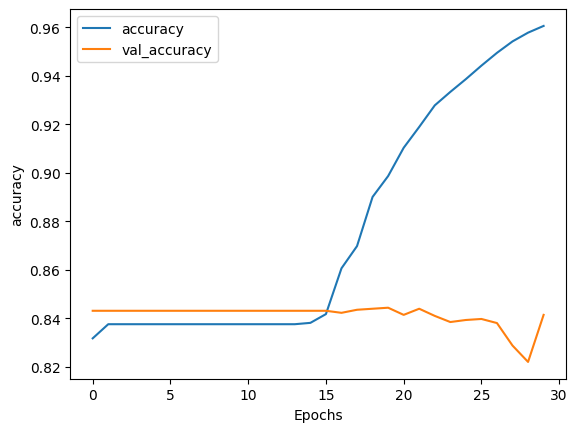

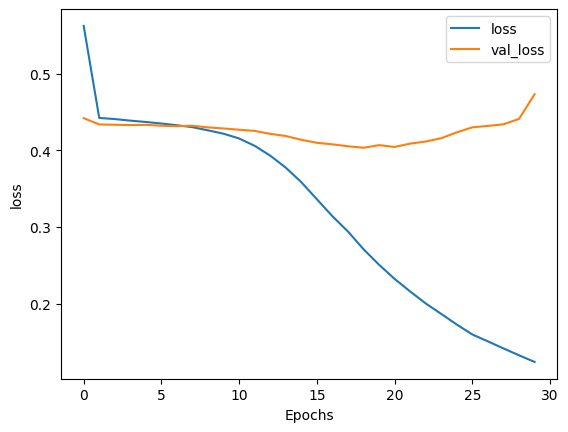

In [24]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


In [ ]:
import keras
model.save("my_model.keras")
reconstructed_model = keras.models.load_model("my_model.keras")

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(reconstructed_model.predict(padded))